# MOUNT DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/Train_converted.zip"

extract_dir = "/content/dataset_original_mobilevit"
train_dir = "/content/dataset_mv/train"
val_dir = "/content/dataset_mv/val"

Mounted at /content/drive


# EXTRACT ZIP DATASET

In [ ]:
import zipfile, os, shutil

# Bersihkan folder lama
shutil.rmtree(extract_dir, ignore_errors=True)
os.makedirs(extract_dir, exist_ok=True)

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Selesai extract:", extract_dir)

Selesai extract: /content/dataset_original_mobilevit


# AUGMENTASI DATASET

In [ ]:
import os, shutil, random
from PIL import Image, ImageEnhance
from tqdm import tqdm

extract_dir = "/content/dataset_original_mobilevit"
train_dir = "/content/dataset_augmented/train"
val_dir = "/content/dataset_augmented/val"

# Bersihkan folder jika ada folder sebelumnya
shutil.rmtree("/content/dataset_augmented", ignore_errors=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

def augment_image(img):
    """Augmentasi ringan dengan variasi acak."""
    aug = img.copy()

    # Rotasi random -10 sampai 10 derajat
    aug = aug.rotate(random.randint(-10, 10))

    # Brightness random
    enhancer = ImageEnhance.Brightness(aug)
    aug = enhancer.enhance(random.uniform(0.8, 1.3))

    # Contrast random
    enhancer = ImageEnhance.Contrast(aug)
    aug = enhancer.enhance(random.uniform(0.8, 1.3))

    # Optional: blur ringan
    # from PIL import ImageFilter
    # aug = aug.filter(ImageFilter.GaussianBlur(radius=random.uniform(0, 1.2)))

    return aug


class_folders = sorted(os.listdir(extract_dir))
print(" Jumlah kelas terdeteksi:", len(class_folders))

target_images = 40

for cls in class_folders:
    cls_path = os.path.join(extract_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    images = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".jpeg", ".png", ".webp", ".bmp"))]

    if len(images) == 0:
        print(f" SKIP: {cls} tidak memiliki gambar.")
        continue

    print(f" Proses kelas: {cls} | {len(images)} gambar ditemukan.")


    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)


    base_val_img = random.choice(images)
    shutil.copy(os.path.join(cls_path, base_val_img), os.path.join(val_dir, cls, f"{cls}_val.jpg"))


    idx = 0
    with tqdm(total=target_images, desc=f"Augmenting {cls}", ncols=80) as pbar:
        while idx < target_images:
            base_img = random.choice(images)
            img = Image.open(os.path.join(cls_path, base_img)).convert("RGB")

            img_aug = augment_image(img)
            save_path = os.path.join(train_dir, cls, f"{cls}_aug_{idx}.jpg")
            img_aug.save(save_path)

            idx += 1
            pbar.update(1)

print("\n Semua kelas sekarang memiliki 40 gambar TRAIN + 1 VALIDASI per kelas.\n")


 Jumlah kelas terdeteksi: 70
 Proses kelas:  Nasya Aulia Efendi | 4 gambar ditemukan.


Augmenting  Nasya Aulia Efendi: 100%|███████████| 40/40 [00:12<00:00,  3.13it/s]


 Proses kelas: Abraham Ganda Napitu | 4 gambar ditemukan.


Augmenting Abraham Ganda Napitu: 100%|██████████| 40/40 [00:15<00:00,  2.59it/s]


 Proses kelas: Abu Bakar Siddiq Siregar | 4 gambar ditemukan.


Augmenting Abu Bakar Siddiq Siregar: 100%|██████| 40/40 [00:01<00:00, 22.07it/s]


 Proses kelas: Ahmad Faqih Hasani | 4 gambar ditemukan.


Augmenting Ahmad Faqih Hasani: 100%|████████████| 40/40 [00:26<00:00,  1.54it/s]


 Proses kelas: Aldi Sanjaya | 4 gambar ditemukan.


Augmenting Aldi Sanjaya: 100%|██████████████████| 40/40 [00:22<00:00,  1.76it/s]


 Proses kelas: Alfajar | 4 gambar ditemukan.


Augmenting Alfajar: 100%|███████████████████████| 40/40 [00:30<00:00,  1.31it/s]


 Proses kelas: Alief Fathur Rahman | 4 gambar ditemukan.


Augmenting Alief Fathur Rahman: 100%|███████████| 40/40 [00:25<00:00,  1.55it/s]


 Proses kelas: Arkan Hariz Chandrawinata Liem | 4 gambar ditemukan.


Augmenting Arkan Hariz Chandrawinata Liem: 100%|█| 40/40 [00:03<00:00, 12.56it/s


 Proses kelas: Bayu Ega Ferdana | 4 gambar ditemukan.


Augmenting Bayu Ega Ferdana: 100%|██████████████| 40/40 [00:04<00:00,  9.19it/s]


 Proses kelas: Bayu Prameswara Haris | 4 gambar ditemukan.


Augmenting Bayu Prameswara Haris: 100%|█████████| 40/40 [00:04<00:00,  9.86it/s]


 Proses kelas: Bezalel Samuel Manik | 4 gambar ditemukan.


Augmenting Bezalel Samuel Manik: 100%|██████████| 40/40 [00:02<00:00, 15.06it/s]


 Proses kelas: Bintang Fikri Fauzan | 4 gambar ditemukan.


Augmenting Bintang Fikri Fauzan: 100%|██████████| 40/40 [00:27<00:00,  1.46it/s]


 Proses kelas: Boy Sandro Sigiro | 4 gambar ditemukan.


Augmenting Boy Sandro Sigiro: 100%|█████████████| 40/40 [00:15<00:00,  2.55it/s]


 Proses kelas: Desty Ananta Purba | 4 gambar ditemukan.


Augmenting Desty Ananta Purba: 100%|████████████| 40/40 [00:20<00:00,  1.95it/s]


 Proses kelas: Dimas Azi Rajab Aizar | 4 gambar ditemukan.


Augmenting Dimas Azi Rajab Aizar: 100%|█████████| 40/40 [00:01<00:00, 29.50it/s]


 Proses kelas: Dito Rifki Irawan | 4 gambar ditemukan.


Augmenting Dito Rifki Irawan: 100%|█████████████| 40/40 [00:09<00:00,  4.19it/s]


 Proses kelas: Dwi Arthur Revangga | 4 gambar ditemukan.


Augmenting Dwi Arthur Revangga: 100%|███████████| 40/40 [00:04<00:00,  8.37it/s]


 Proses kelas: Dyo Dwi Carol Bukit | 4 gambar ditemukan.


Augmenting Dyo Dwi Carol Bukit: 100%|███████████| 40/40 [00:02<00:00, 18.72it/s]


 Proses kelas: Eden Wijaya  | 4 gambar ditemukan.


Augmenting Eden Wijaya : 100%|██████████████████| 40/40 [00:30<00:00,  1.29it/s]


 Proses kelas: Eichal Elphindo Ginting | 4 gambar ditemukan.


Augmenting Eichal Elphindo Ginting: 100%|███████| 40/40 [00:02<00:00, 15.03it/s]


 Proses kelas: Elsa Elisa Yohana Sianturi | 4 gambar ditemukan.


Augmenting Elsa Elisa Yohana Sianturi: 100%|████| 40/40 [00:10<00:00,  3.79it/s]


 Proses kelas: Fajrul Ramadhana Aqsa | 4 gambar ditemukan.


Augmenting Fajrul Ramadhana Aqsa: 100%|█████████| 40/40 [00:01<00:00, 26.81it/s]


 Proses kelas: Falih Dzakwan Zuhdi | 4 gambar ditemukan.


Augmenting Falih Dzakwan Zuhdi: 100%|███████████| 40/40 [00:01<00:00, 24.51it/s]


 Proses kelas: Fathan Andi Kartagama | 4 gambar ditemukan.


Augmenting Fathan Andi Kartagama: 100%|█████████| 40/40 [00:18<00:00,  2.11it/s]


 Proses kelas: Fayyadh Abdillah | 4 gambar ditemukan.


Augmenting Fayyadh Abdillah: 100%|██████████████| 40/40 [00:12<00:00,  3.10it/s]


 Proses kelas: Femmy Aprillia Putri | 4 gambar ditemukan.


Augmenting Femmy Aprillia Putri: 100%|██████████| 40/40 [00:09<00:00,  4.26it/s]


 Proses kelas: Ferdana Al Hakim | 4 gambar ditemukan.


Augmenting Ferdana Al Hakim: 100%|██████████████| 40/40 [00:16<00:00,  2.43it/s]


 Proses kelas: Festus Mikhael  | 4 gambar ditemukan.


Augmenting Festus Mikhael : 100%|███████████████| 40/40 [00:37<00:00,  1.06it/s]


 Proses kelas: Fiqri Aldiansyah | 4 gambar ditemukan.


Augmenting Fiqri Aldiansyah: 100%|██████████████| 40/40 [00:14<00:00,  2.81it/s]


 Proses kelas: Freddy Harahap | 4 gambar ditemukan.


Augmenting Freddy Harahap: 100%|████████████████| 40/40 [00:03<00:00, 12.60it/s]


 Proses kelas: Gabriella Natalya Rumapea | 4 gambar ditemukan.


Augmenting Gabriella Natalya Rumapea: 100%|█████| 40/40 [00:23<00:00,  1.70it/s]


 Proses kelas: Garland Wijaya | 4 gambar ditemukan.


Augmenting Garland Wijaya: 100%|████████████████| 40/40 [00:19<00:00,  2.07it/s]


 Proses kelas: Havidz Ridho Pratama | 4 gambar ditemukan.


Augmenting Havidz Ridho Pratama: 100%|██████████| 40/40 [00:23<00:00,  1.72it/s]


 Proses kelas: Ichsan Kuntadi Baskara | 4 gambar ditemukan.


Augmenting Ichsan Kuntadi Baskara: 100%|████████| 40/40 [00:32<00:00,  1.25it/s]


 Proses kelas: Ikhsannudin Lathief | 4 gambar ditemukan.


Augmenting Ikhsannudin Lathief: 100%|███████████| 40/40 [00:02<00:00, 18.25it/s]


 Proses kelas: Intan Permata Sari  | 4 gambar ditemukan.


Augmenting Intan Permata Sari : 100%|███████████| 40/40 [00:05<00:00,  7.83it/s]


 Proses kelas: JP. Rafi Radiktya Arkan. R. AZ | 4 gambar ditemukan.


Augmenting JP. Rafi Radiktya Arkan. R. AZ: 100%|█| 40/40 [00:23<00:00,  1.71it/s


 Proses kelas: Joshia Fernandes Sectio Purba  | 4 gambar ditemukan.


Augmenting Joshia Fernandes Sectio Purba : 100%|█| 40/40 [00:39<00:00,  1.01it/s


 Proses kelas: Joshua Palti Sinaga | 8 gambar ditemukan.


Augmenting Joshua Palti Sinaga: 100%|███████████| 40/40 [00:40<00:00,  1.01s/it]


 Proses kelas: Joy Daniella V | 4 gambar ditemukan.


Augmenting Joy Daniella V: 100%|████████████████| 40/40 [00:08<00:00,  4.90it/s]


 Proses kelas: Joyapul Hanscalvin Panjaitan | 4 gambar ditemukan.


Augmenting Joyapul Hanscalvin Panjaitan: 100%|██| 40/40 [00:04<00:00,  8.43it/s]


 Proses kelas: Kayla Chika Lathisya  | 4 gambar ditemukan.


Augmenting Kayla Chika Lathisya : 100%|█████████| 40/40 [00:13<00:00,  2.89it/s]


 Proses kelas: Kenneth Austin Wijaya | 4 gambar ditemukan.


Augmenting Kenneth Austin Wijaya: 100%|█████████| 40/40 [00:02<00:00, 16.90it/s]


 Proses kelas: Kevin Naufal Dany | 4 gambar ditemukan.


Augmenting Kevin Naufal Dany: 100%|█████████████| 40/40 [00:10<00:00,  3.71it/s]


 Proses kelas: Lois Novel E Gurning | 4 gambar ditemukan.


Augmenting Lois Novel E Gurning: 100%|██████████| 40/40 [00:01<00:00, 24.93it/s]


 Proses kelas: Machzaul harmansyah  | 4 gambar ditemukan.


Augmenting Machzaul harmansyah : 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


 Proses kelas: Martua Kevin A.M.H.Lubis | 4 gambar ditemukan.


Augmenting Martua Kevin A.M.H.Lubis: 100%|██████| 40/40 [00:02<00:00, 13.96it/s]


 Proses kelas: Muhammad Fasya Atthoriq | 4 gambar ditemukan.


Augmenting Muhammad Fasya Atthoriq: 100%|███████| 40/40 [00:22<00:00,  1.77it/s]


 Proses kelas: Muhammad Nelwan Fakhri  | 4 gambar ditemukan.


Augmenting Muhammad Nelwan Fakhri : 100%|███████| 40/40 [00:12<00:00,  3.12it/s]


 Proses kelas: Muhammad Riveldo Hermawan Putra | 4 gambar ditemukan.


Augmenting Muhammad Riveldo Hermawan Putra: 100%|█| 40/40 [00:02<00:00, 13.80it/


 Proses kelas: Muhammad Zada Rizki | 4 gambar ditemukan.


Augmenting Muhammad Zada Rizki: 100%|███████████| 40/40 [00:38<00:00,  1.05it/s]


 Proses kelas: Mychael Daniel N | 4 gambar ditemukan.


Augmenting Mychael Daniel N: 100%|██████████████| 40/40 [00:24<00:00,  1.62it/s]


 Proses kelas: Raditya Erza Farandi | 4 gambar ditemukan.


Augmenting Raditya Erza Farandi: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]


 Proses kelas: Rahmat Aldi Nasda | 4 gambar ditemukan.


Augmenting Rahmat Aldi Nasda: 100%|█████████████| 40/40 [00:01<00:00, 25.62it/s]


 Proses kelas: Randy Hendriyawan | 4 gambar ditemukan.


Augmenting Randy Hendriyawan: 100%|█████████████| 40/40 [00:12<00:00,  3.09it/s]


 Proses kelas: Rayhan Fadel Irwanto  | 4 gambar ditemukan.


Augmenting Rayhan Fadel Irwanto : 100%|█████████| 40/40 [01:00<00:00,  1.52s/it]


 Proses kelas: Rayhan Fatih Gunawan | 4 gambar ditemukan.


Augmenting Rayhan Fatih Gunawan: 100%|██████████| 40/40 [00:01<00:00, 23.91it/s]


 Proses kelas: Reynaldi Cristian Simamora | 4 gambar ditemukan.


Augmenting Reynaldi Cristian Simamora: 100%|████| 40/40 [00:02<00:00, 15.37it/s]


 Proses kelas: Rizky Abdillah  | 4 gambar ditemukan.


Augmenting Rizky Abdillah : 100%|███████████████| 40/40 [00:24<00:00,  1.61it/s]


 Proses kelas: Royfran Roger Valentino | 4 gambar ditemukan.


Augmenting Royfran Roger Valentino: 100%|███████| 40/40 [00:01<00:00, 22.23it/s]


 Proses kelas: Rustian Afencius Marbun | 4 gambar ditemukan.


Augmenting Rustian Afencius Marbun: 100%|███████| 40/40 [00:02<00:00, 15.70it/s]


 Proses kelas: Shintya Ayu Wardani | 4 gambar ditemukan.


Augmenting Shintya Ayu Wardani: 100%|███████████| 40/40 [00:13<00:00,  3.04it/s]


 Proses kelas: Sikah Nubuahtul Ilmi | 4 gambar ditemukan.


Augmenting Sikah Nubuahtul Ilmi: 100%|██████████| 40/40 [00:11<00:00,  3.39it/s]


 Proses kelas: William Chan | 4 gambar ditemukan.


Augmenting William Chan: 100%|██████████████████| 40/40 [00:02<00:00, 18.98it/s]


 Proses kelas: Yohanna Anzelika Sitepu  | 4 gambar ditemukan.


Augmenting Yohanna Anzelika Sitepu : 100%|██████| 40/40 [00:09<00:00,  4.44it/s]


 Proses kelas: Zakhi algifari | 4 gambar ditemukan.


Augmenting Zakhi algifari: 100%|████████████████| 40/40 [00:25<00:00,  1.58it/s]


 Proses kelas: Zaky Ahmad Makarim | 4 gambar ditemukan.


Augmenting Zaky Ahmad Makarim: 100%|████████████| 40/40 [00:32<00:00,  1.24it/s]


 Proses kelas: Zefanya Danovanta Tarigan | 4 gambar ditemukan.


Augmenting Zefanya Danovanta Tarigan: 100%|█████| 40/40 [00:25<00:00,  1.58it/s]


 Proses kelas: Zidan Raihan | 4 gambar ditemukan.


Augmenting Zidan Raihan: 100%|██████████████████| 40/40 [00:25<00:00,  1.56it/s]


 Proses kelas: hayyatul fajri | 4 gambar ditemukan.


Augmenting hayyatul fajri: 100%|████████████████| 40/40 [00:05<00:00,  7.72it/s]


 Semua kelas sekarang memiliki 40 gambar TRAIN + 1 VALIDASI per kelas.



# SPLIT DATA

In [ ]:
import random

# Bersihkan folder output
shutil.rmtree("/content/dataset_mv", ignore_errors=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Ambil folder kelas
class_folders = sorted(os.listdir(extract_dir))
print("Total kelas:", len(class_folders))

for cls in class_folders:
    cls_path = os.path.join(extract_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    images = [f for f in os.listdir(cls_path)
              if f.lower().endswith((".jpg", ".jpeg", ".png"))]

    if len(images) < 4:
        print(" WARNING:", cls, "kurang dari 4 gambar → dilewati")
        continue

    random.shuffle(images)

    train_imgs = images[:3]
    val_imgs = images[3:4]

    # Buat folder
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    # Copy file
    for img in train_imgs:
        shutil.copy(os.path.join(cls_path, img),
                    os.path.join(train_dir, cls, img))
    for img in val_imgs:
        shutil.copy(os.path.join(cls_path, img),
                    os.path.join(val_dir, cls, img))

print("Split dataset selesai!")


Total kelas: 70
Split dataset selesai!


# LOAD DATASET

In [ ]:
import tensorflow as tf

img_size = (256, 256)
batch_size = 8

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Jumlah kelas:", num_classes)

Found 3010 files belonging to 70 classes.
Found 140 files belonging to 70 classes.
Jumlah kelas: 70


# BUILD MODEL

In [ ]:
!pip install -q tf-keras-vis  # tambahan untuk visualisasi opsional

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.2 MB/s eta 0:00:00


# MODEL MobileViT-S (Keras Applications)

In [ ]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# MOBILEViT tidak tersedia di Keras default
# → kita gunakan MobileNetV3Small (paling mirip konsepnya: ringan + powerful)

base = MobileNetV3Small(
    input_shape=(256,256,3),
    include_top=False,
    weights="imagenet"
)

base.trainable = False

x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base.input, outputs=output)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 128, 128,  │        432 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 128, 128,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 129, 129,  │          0 │ activation[0][0]  │
│ (ZeroPadding2D)     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        144 │ expanded_conv_de… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │          0 │ re_lu[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │        136 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │          0 │ expanded_conv_sq… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │        144 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 1, 16)  │          0 │ expanded_conv_sq… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 1, 1, 16)  │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 1, 1, 16)  │          0 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 64, 64,    │          0 │ re_lu[0][0],      │
│ (Multiply)          │ 16)               │            │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        256 │ expanded_conv_sq

 Total params: 979,510 (3.74 MB)

 Trainable params: 40,390 (157.77 KB)

 Non-trainable params: 939,120 (3.58 MB)

# TRAINING

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10

)

Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 159s 406ms/step - accuracy: 0.3188 - loss: 3.3426 - val_accuracy: 0.9429 - val_loss: 0.6927
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 150s 397ms/step - accuracy: 0.9387 - loss: 0.5946 - val_accuracy: 0.9857 - val_loss: 0.2488
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 156s 413ms/step - accuracy: 0.9861 - loss: 0.2408 - val_accuracy: 1.0000 - val_loss: 0.1186
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 195s 395ms/step - accuracy: 0.9978 - loss: 0.1295 - val_accuracy: 1.0000 - val_loss: 0.0669
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 150s 397ms/step - accuracy: 0.9982 - loss: 0.0785 - val_accuracy: 1.0000 - val_loss: 0.0444
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 153s 407ms/step - accuracy: 0.9978 - loss: 0.0577 - val_accuracy: 1.0000 - val_loss: 0.0288
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 162s 430ms/step - accuracy: 0.9990 - loss: 0.0392 - val_accuracy: 1.0000 - val_loss: 0.0220
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 148s 394ms/step - accuracy: 0.9991 -

# EVALUASI

In [ ]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("Jumlah sampel validasi:", len(y_true))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Jumlah sampel validasi: 140


# CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
                                 precision    recall  f1-score   support

             Nasya Aulia Efendi       1.00      1.00      1.00         2
           Abraham Ganda Napitu       1.00      1.00      1.00         2
       Abu Bakar Siddiq Siregar       1.00      1.00      1.00         2
             Ahmad Faqih Hasani       1.00      1.00      1.00         2
                   Aldi Sanjaya       1.00      1.00      1.00         2
                        Alfajar       1.00      1.00      1.00         2
            Alief Fathur Rahman       1.00      1.00      1.00         2
 Arkan Hariz Chandrawinata Liem       1.00      1.00      1.00         2
               Bayu Ega Ferdana       1.00      1.00      1.00         2
          Bayu Prameswara Haris       1.00      1.00      1.00         2
           Bezalel Samuel Manik       1.00      1.00      1.00         2
           Bintang Fikri Fauzan       1.00      1.00      1.00         2
              Boy Sandro S

# CONFUSION MATRIX

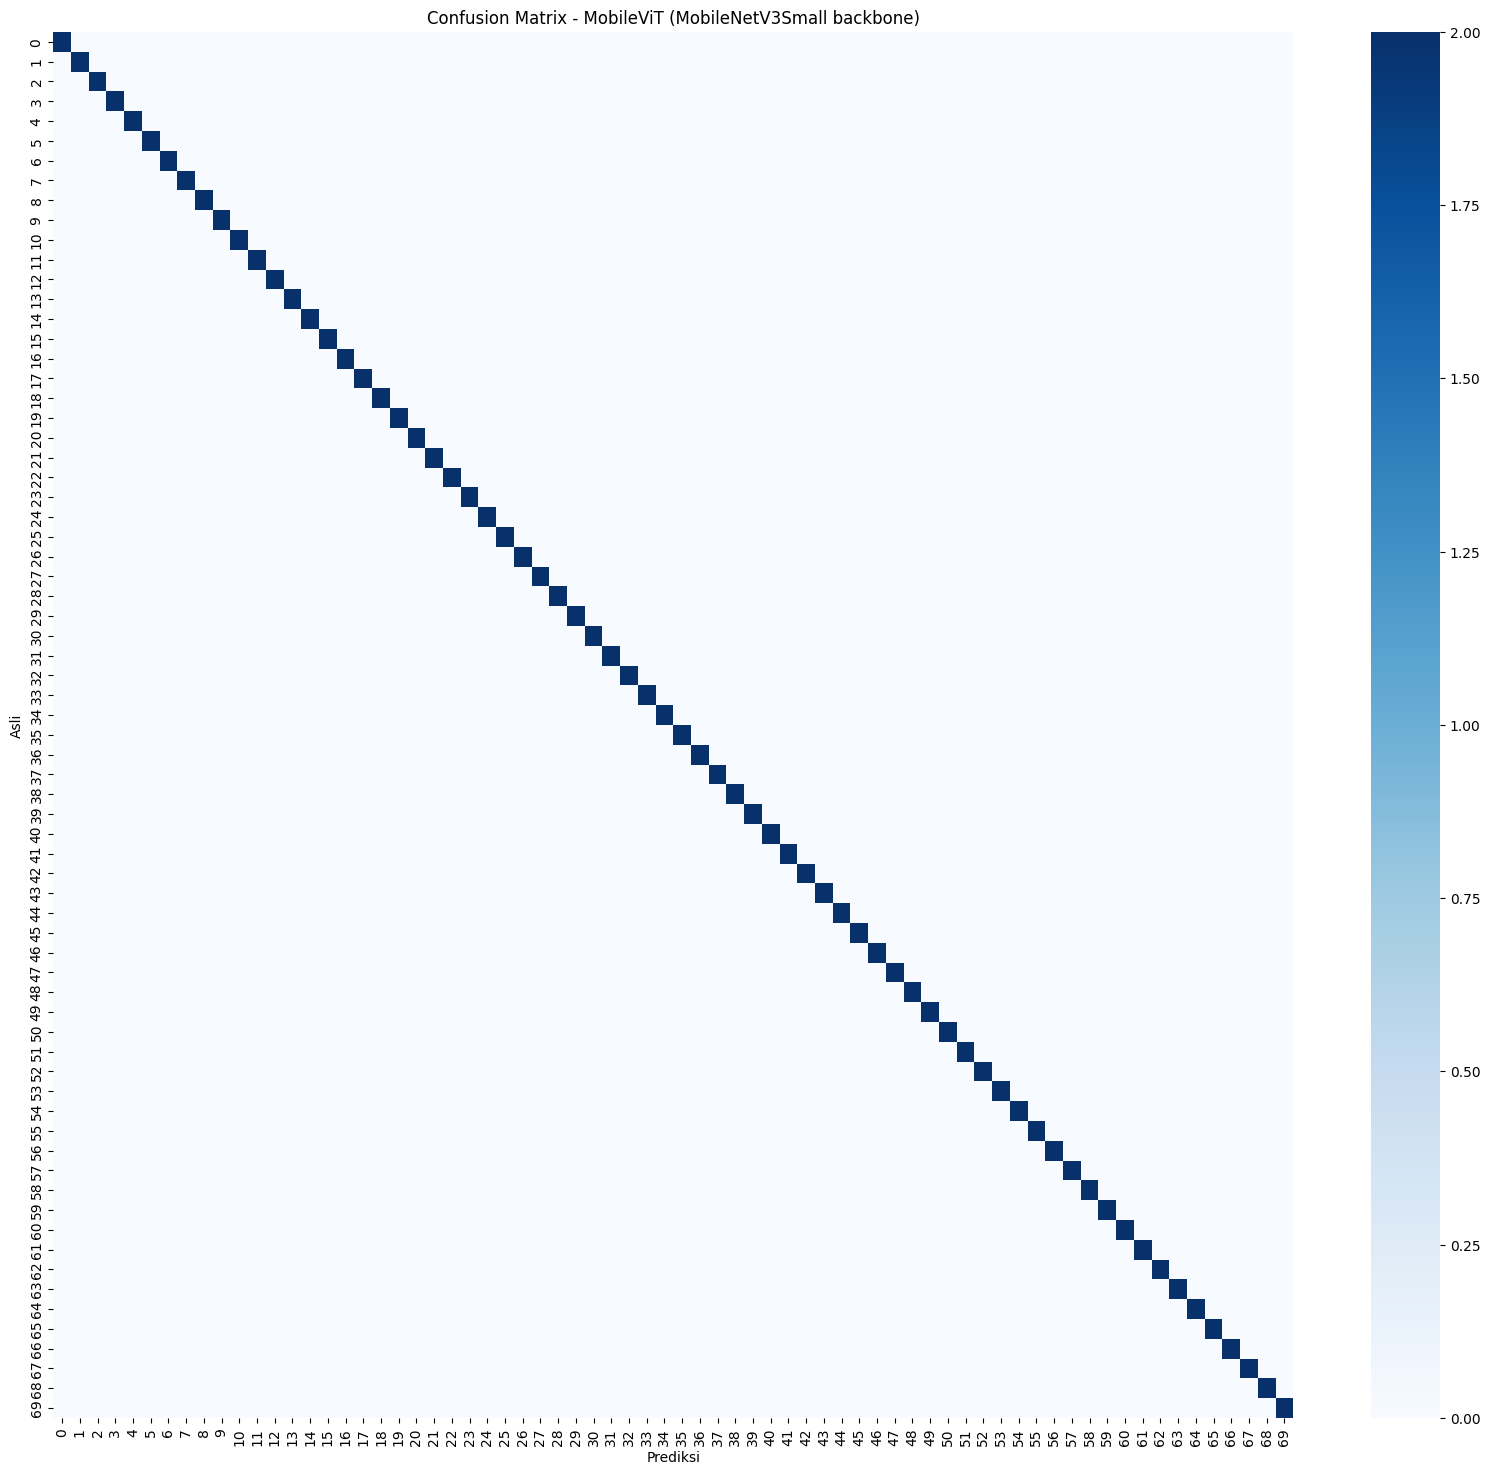

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20,18))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix - MobileViT (MobileNetV3Small backbone)")
plt.xlabel("Prediksi")
plt.ylabel("Asli")
plt.show()

# SAVE MODEL

In [ ]:
from google.colab import files
import tensorflow as tf
import os

save_dir = "/content/saved_model"
os.makedirs(save_dir, exist_ok=True)

h5_path = os.path.join(save_dir, "model_mobilevit_converted.h5")
model.save(h5_path)
print("✔ Model disimpan dalam format .h5:", h5_path)

savedmodel_path = os.path.join(save_dir, "saved_model_format")
model.export(savedmodel_path)
print("✔ Model disimpan dalam format SavedModel:", savedmodel_path)

tflite_path = os.path.join(save_dir, "model_mobilevit_converted.tflite")

converter = tf.lite.TFLiteConverter.from_saved_model(savedmodel_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # opsi kompres
tflite_model = converter.convert()

with open(tflite_path, "wb") as f:
    f.write(tflite_model)

print("✔ Model berhasil dikonversi ke .tflite:", tflite_path)

print("\n⬇️ Mendownload model...")

files.download(h5_path)
files.download(tflite_path)


✔ Model disimpan dalam format .h5: /content/saved_model/model_mobilevit_converted.h5
Saved artifact at '/content/saved_model/saved_model_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 70), dtype=tf.float32, name=None)
Captures:
  139928533945616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139928533946576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139928533946384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139928533946960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139928533946000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139928533943696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139928533946768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139928533945424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139928533943888: TensorSpec(shape=(), dtype=t

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>